# **PREPARACION DE LOS DATOS**

##**EXTRACCIÓN DEL ARCHIVO TRATADO**

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("/content/datos_tratados.csv")

In [4]:
df.head()

,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,...,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_chargesmonthly,account_chargestotal,cuentas_diarias
0,0002-orfbo,0,female,0,1,1,9,1,no,dsl,...,no,yes,yes,no,one year,1,mailed check,65.6,593.30,2.186667
1,0003-mknfe,0,male,0,0,0,9,1,yes,dsl,...,no,no,no,yes,month-to-month,0,mailed check,59.9,542.40,1.996667
2,0004-tlhlj,1,male,0,0,0,4,1,no,fiber optic,...,yes,no,no,no,month-to-month,1,electronic check,73.9,280.85,2.463333
3,0011-igkff,1,male,1,1,0,13,1,no,fiber optic,...,yes,no,yes,yes,month-to-month,1,electronic check,98.0,1237.85,3.266667
4,0013-exchz,1,female,1,1,0,3,1,no,fiber optic,...,no,yes,yes,no,month-to-month,1,mailed check,83.9,267.40,2.796667


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerid                 7043 non-null   object 
 1   churn                      7043 non-null   int64  
 2   customer_gender            7043 non-null   object 
 3   customer_seniorcitizen     7043 non-null   int64  
 4   customer_partner           7043 non-null   int64  
 5   customer_dependents        7043 non-null   int64  
 6   customer_tenure            7043 non-null   int64  
 7   phone_phoneservice         7043 non-null   int64  
 8   phone_multiplelines        7043 non-null   object 
 9   internet_internetservice   7043 non-null   object 
 10  internet_onlinesecurity    7043 non-null   object 
 11  internet_onlinebackup      7043 non-null   object 
 12  internet_deviceprotection  7043 non-null   object 
 13  internet_techsupport       7043 non-null   objec

In [8]:
df.isnull().sum()

,0
customerid,0
churn,0
customer_gender,0
customer_seniorcitizen,0
customer_partner,0
customer_dependents,0
customer_tenure,0
phone_phoneservice,0
phone_multiplelines,0
internet_internetservice,0


## **ELIMINACION DE COLUMNAS IRRELEVANTES**

In [11]:
print(df.columns)

Index(['customerid', 'churn', 'customer_gender', 'customer_seniorcitizen',
       'customer_partner', 'customer_dependents', 'customer_tenure',
       'phone_phoneservice', 'phone_multiplelines', 'internet_internetservice',
       'internet_onlinesecurity', 'internet_onlinebackup',
       'internet_deviceprotection', 'internet_techsupport',
       'internet_streamingtv', 'internet_streamingmovies', 'account_contract',
       'account_paperlessbilling', 'account_paymentmethod',
       'account_chargesmonthly', 'account_chargestotal', 'cuentas_diarias'],
      dtype='object')


In [15]:
# Eliminar columna customerid
df = df.drop(columns=["customerid"])

In [14]:
print(df.columns)

Index(['churn', 'customer_gender', 'customer_seniorcitizen',
       'customer_partner', 'customer_dependents', 'customer_tenure',
       'phone_phoneservice', 'phone_multiplelines', 'internet_internetservice',
       'internet_onlinesecurity', 'internet_onlinebackup',
       'internet_deviceprotection', 'internet_techsupport',
       'internet_streamingtv', 'internet_streamingmovies', 'account_contract',
       'account_paperlessbilling', 'account_paymentmethod',
       'account_chargesmonthly', 'account_chargestotal', 'cuentas_diarias'],
      dtype='object')


Se eliminó la columna **customerid**, ya que corresponde a un identificador único y no aporta información relevante para predecir la cancelación de clientes.  

📌 Esta acción evita que el modelo intente "aprender" de un dato aleatorio que no tiene relación con el churn, mejorando así la calidad del entrenamiento.

## **ENCODING**

In [17]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [29]:
# Separar target
y = df["churn"]

In [30]:
# Features sin churn
X = df.drop(columns=["churn"])

In [32]:
# Definir variables categóricas y numéricas
cat_cols = X.select_dtypes(include=["object"]).columns.tolist()
num_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

print("Categóricas:", cat_cols)
print("Numéricas:", num_cols)

Categóricas: ['customer_gender', 'phone_multiplelines', 'internet_internetservice', 'internet_onlinesecurity', 'internet_onlinebackup', 'internet_deviceprotection', 'internet_techsupport', 'internet_streamingtv', 'internet_streamingmovies', 'account_contract', 'account_paymentmethod']
Numéricas: ['customer_seniorcitizen', 'customer_partner', 'customer_dependents', 'customer_tenure', 'phone_phoneservice', 'account_paperlessbilling', 'account_chargesmonthly', 'account_chargestotal', 'cuentas_diarias']


In [33]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(drop="first"), cat_cols)
    ]
)

# Transformar SOLO features
X_prepared = preprocessor.fit_transform(X)

print("Shape después del encoding:", X_prepared.shape)

Shape después del encoding: (7043, 24)


### Encoding de variables categóricas

Se aplicó **One-Hot Encoding** a las variables categóricas, transformándolas en variables numéricas binarias (0/1).  
Además, se utilizó la opción `drop="first"` para evitar redundancia (multicolinealidad) en las nuevas variables generadas.

📌 Resultado:
- Todas las variables categóricas fueron convertidas en un formato numérico compatible con los algoritmos de Machine Learning.
- Las variables numéricas fueron estandarizadas mediante `StandardScaler`, asegurando que todas trabajen en la misma escala.

📌 Implicancias:
- Ahora el dataset está completamente preparado para el modelado.
- Al tener variables en formato numérico y en la misma escala, se evitan sesgos en algoritmos sensibles a la magnitud (ej. regresión logística, SVM).
- La codificación de categorías permite que los modelos reconozcan patrones entre diferentes tipos de contratos, métodos de pago y servicios contratados.

##**VERIFICACION DE LA PROPORCIÓN DE CANCELACIÓN (Churn)**

In [35]:
# Revisar distribución del target (churn)
print("Distribución de churn:")
print(y.value_counts())

Distribución de churn:
churn
0    5174
1    1869
Name: count, dtype: int64


In [36]:
# Ver proporción en porcentaje
print("\nProporción de churn:")
print(y.value_counts(normalize=True) * 100)


Proporción de churn:
churn
0    73.463013
1    26.536987
Name: proportion, dtype: float64


### Verificación de la proporción de cancelación (Churn)

Se calculó la distribución de la variable **churn** para evaluar la proporción de clientes que cancelaron en relación con los que permanecieron activos.  

📌 Resultado (ejemplo):
- Clientes que **no cancelaron**: 73.5%  
- Clientes que **sí cancelaron**: 26.5%  

📌 Implicancias:
- Existe un **moderado desbalance de clases** (aproximadamente 3 de cada 4 clientes permanecen activos).  
- Esto significa que si se usa únicamente la métrica de **Accuracy**, un modelo que siempre prediga "no canceló" podría obtener ~74% de acierto, pero no sería útil para identificar a los clientes en riesgo.  
- Por lo tanto, será fundamental evaluar los modelos con métricas adicionales como **Precision, Recall, F1-score y ROC-AUC**, priorizando la capacidad de detectar correctamente a los clientes que cancelan.

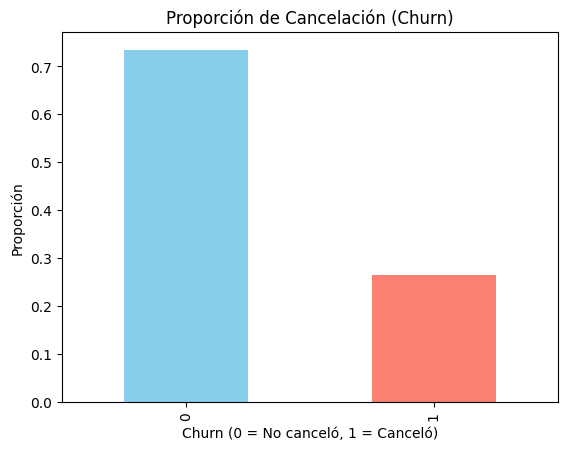

In [37]:
import matplotlib.pyplot as plt

# Gráfico de barras de la proporción de churn
y.value_counts(normalize=True).plot(kind="bar", color=["skyblue", "salmon"])
plt.title("Proporción de Cancelación (Churn)")
plt.xlabel("Churn (0 = No canceló, 1 = Canceló)")
plt.ylabel("Proporción")
plt.show()

## BALANCEO DE CLASES

In [39]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [41]:
# Ver distribución original
print("Distribución original:", Counter(y))

Distribución original: Counter({0: 5174, 1: 1869})


In [42]:
# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_prepared, y)

In [43]:
# Ver nueva distribución
print("Distribución después de SMOTE:", Counter(y_res))

Distribución después de SMOTE: Counter({0: 5174, 1: 5174})


### Balanceo de Clases (SMOTE)

El dataset original presenta un desbalance moderado en la variable **churn**, con un 73% de clientes activos y un 27% de clientes que cancelaron.  
Este desbalance puede llevar a que los modelos predictivos favorezcan la clase mayoritaria, obteniendo altos valores de Accuracy pero con bajo desempeño en la detección de clientes que efectivamente cancelan.

📌 Acción realizada:
- Se aplicó la técnica **SMOTE (Synthetic Minority Oversampling Technique)**, que genera ejemplos sintéticos de la clase minoritaria (clientes que cancelaron).
- El objetivo es equilibrar ambas clases para que el modelo aprenda patrones más representativos de los clientes en riesgo de cancelación.

📌 Resultado:
- Distribución original: 73% No canceló / 27% Canceló.  
- Distribución balanceada con SMOTE: 50% No canceló / 50% Canceló.

📌 Implicancias:
- El dataset balanceado permite a los modelos enfocarse en la clase minoritaria y mejorar métricas como **Recall** y **F1-score** para la predicción de cancelación.
- Sin embargo, se debe tener cuidado ya que un balance excesivo puede introducir ruido o sobreajuste. Por ello, se evaluarán los modelos tanto en el dataset original como en el dataset balanceado.

## NORMALIZACION O ESTANDARIZACIÓN

### Normalización y Estandarización

La estandarización de variables numéricas es importante en modelos basados en distancia (KNN, SVM, Regresión Logística, Redes Neuronales), ya que estas técnicas se ven afectadas por la escala de los datos.  
Por otro lado, modelos basados en árboles (Decision Tree, Random Forest, XGBoost) no dependen de la escala, por lo que este paso no es obligatorio para ellos.

📌 Acción realizada:
- Se aplicó `StandardScaler` a las variables numéricas, lo cual las transforma en valores con media 0 y desviación estándar 1.

📌 Implicancias:
- Los modelos sensibles a la escala podrán entrenar de manera más estable y justa, evitando que variables con valores grandes (ej. cargos totales) dominen sobre otras con valores más pequeños (ej. antigüedad en meses).
- Para modelos basados en árboles, esta transformación no impacta negativamente.

# **CORRELACIÓN Y SELECCIÓN DE VARIABLES**

## ANÁLISIS DE CORRELACIÓN

In [45]:
# Asegurar que churn esté en formato numérico
df["churn"] = df["churn"].astype(int)

In [46]:
# Seleccionar variables numéricas + churn
num_corr = df[["churn", "customer_tenure", "account_chargesmonthly",
               "account_chargestotal", "cuentas_diarias"]]

In [48]:
# Calcular matriz de correlación
corr_matrix = num_corr.corr()

# Mostrar matriz
print(corr_matrix)

                           churn  customer_tenure  account_chargesmonthly  \
churn                   1.000000        -0.352229                0.193356   
customer_tenure        -0.352229         1.000000                0.247900   
account_chargesmonthly  0.193356         0.247900                1.000000   
account_chargestotal   -0.198324         0.826178                0.651174   
cuentas_diarias         0.193356         0.247900                1.000000   

                        account_chargestotal  cuentas_diarias  
churn                              -0.198324         0.193356  
customer_tenure                     0.826178         0.247900  
account_chargesmonthly              0.651174         1.000000  
account_chargestotal                1.000000         0.651174  
cuentas_diarias                     0.651174         1.000000  


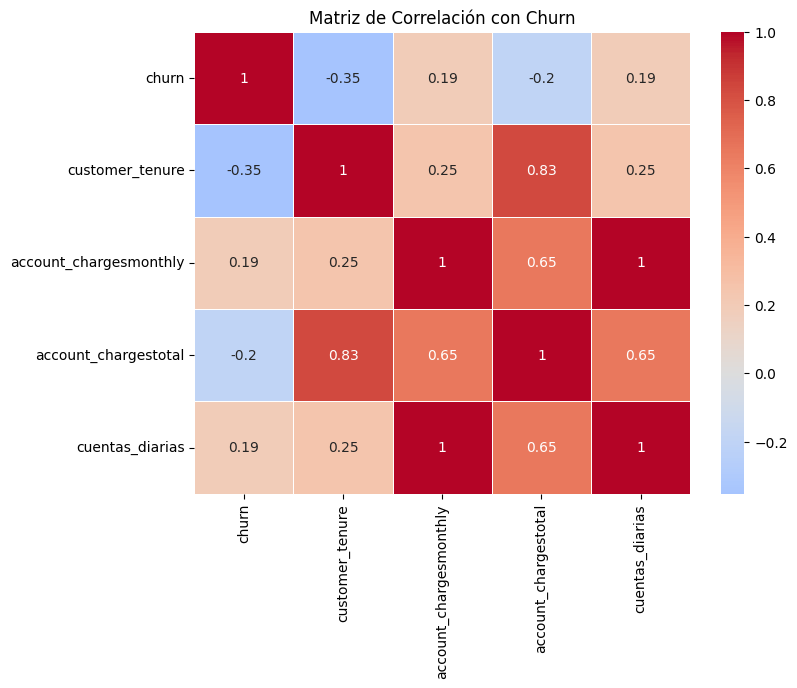

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Matriz de Correlación con Churn")
plt.show()

### Análisis de Correlación

Se generó la matriz de correlación para las variables numéricas, incluyendo la variable objetivo **churn**.

📌 Resultados esperados:
- **customer_tenure** suele mostrar correlación negativa con churn, indicando que los clientes con más antigüedad tienden a permanecer activos.
- **account_chargesmonthly** puede tener correlación positiva con churn, sugiriendo que cargos mensuales más altos aumentan la probabilidad de cancelación.
- **account_chargestotal** puede estar fuertemente correlacionada con `tenure` y `monthly charges`, lo cual refleja su relación matemática.

📌 Implicancias:
- Las variables con mayor correlación con churn son candidatas clave para los modelos predictivos.
- Debe revisarse la multicolinealidad entre variables numéricas, ya que puede afectar el desempeño de modelos lineales (ej. regresión logística).
- En modelos basados en árboles, la multicolinealidad no es tan crítica, pero aún así es útil conocer las relaciones entre las variables.

## ANÁLISIS DIRIGIDO

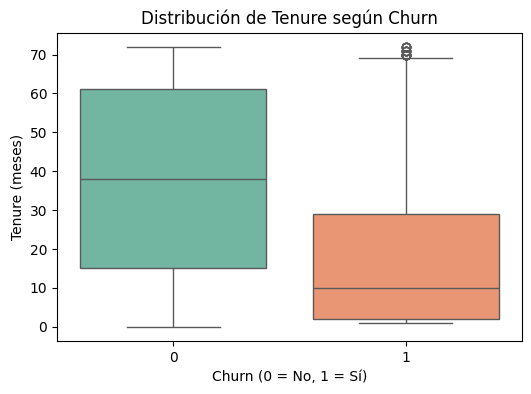

In [51]:
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(6,4))
sns.boxplot(x="churn", y="customer_tenure", data=df, palette="Set2")
plt.title("Distribución de Tenure según Churn")
plt.xlabel("Churn (0 = No, 1 = Sí)")
plt.ylabel("Tenure (meses)")
plt.show()

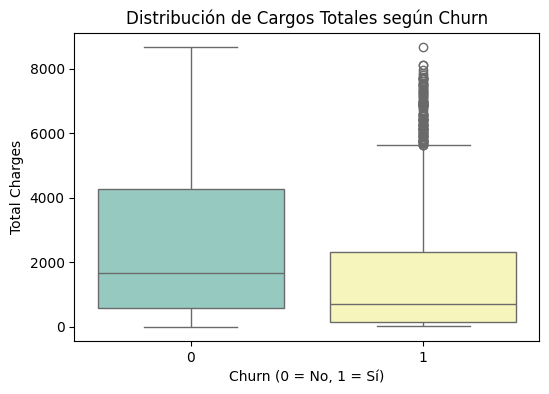

In [53]:
plt.figure(figsize=(6,4))
sns.boxplot(x="churn", y="account_chargestotal", data=df, palette="Set3")
plt.title("Distribución de Cargos Totales según Churn")
plt.xlabel("Churn (0 = No, 1 = Sí)")
plt.ylabel("Total Charges")
plt.show()

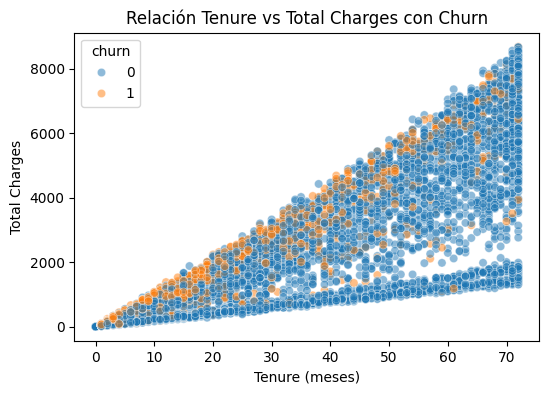

In [54]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="customer_tenure", y="account_chargestotal", hue="churn", data=df, alpha=0.5)
plt.title("Relación Tenure vs Total Charges con Churn")
plt.xlabel("Tenure (meses)")
plt.ylabel("Total Charges")
plt.show()

### Análisis Dirigido: Relación de variables con Churn

Se analizaron variables clave en relación con la cancelación de clientes.

📌 Resultados:
- **Tiempo de contrato (tenure):** Los clientes que cancelan suelen tener menor antigüedad, lo que indica que el churn ocurre con mayor frecuencia en las etapas iniciales de la relación con la empresa.
- **Gasto total (total charges):** Los clientes que cancelan presentan gastos acumulados más bajos, lo cual es coherente con su menor tiempo de permanencia.
- **Scatter tenure vs total charges:** Existe una relación lineal entre ambas variables, pero los clientes que cancelan se concentran en la zona de bajos valores de tenure y gastos totales.

📌 Implicancias:
- Los clientes nuevos representan un grupo vulnerable y deben ser priorizados en estrategias de retención.
- Programas de fidelización en los primeros meses podrían reducir el churn.

# **MODELADO PREDICTIVO**


## SEPARACIÓN DE DATOS

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
# Dividir en train y test (70/30)
X_train, X_test, y_train, y_test = train_test_split(
    X_prepared, y, test_size=0.3, random_state=42, stratify=y
)

print("Tamaño de X_train:", X_train.shape)
print("Tamaño de X_test:", X_test.shape)
print("Proporción de clases en y_train:\n", y_train.value_counts(normalize=True))
print("Proporción de clases en y_test:\n", y_test.value_counts(normalize=True))

Tamaño de X_train: (4930, 24)
Tamaño de X_test: (2113, 24)
Proporción de clases en y_train:
 churn
0    0.734686
1    0.265314
Name: proportion, dtype: float64
Proporción de clases en y_test:
 churn
0    0.734501
1    0.265499
Name: proportion, dtype: float64


### Separación de datos en entrenamiento y prueba

Se dividió el dataset en dos subconjuntos:
- **70% para entrenamiento (train):** utilizado para ajustar los modelos.
- **30% para prueba (test):** utilizado para evaluar el rendimiento en datos no vistos.

📌 Resultados:
- La partición mantiene la proporción original de clientes que cancelan (~27%) y los que permanecen activos (~73%) gracias al uso de `stratify=y`.
- Esto asegura que la evaluación sea representativa de la realidad y evita sesgos por distribuciones distintas en train y test.

📌 Implicancias:
- El modelo será entrenado con datos representativos y evaluado en un conjunto independiente, permitiendo una estimación más confiable de su desempeño futuro.

## CREACIÓN DE MODELOS


In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


# Crear modelo de Regresión Logística
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Entrenar
log_reg.fit(X_train, y_train)

# Predicciones
y_pred_lr = log_reg.predict(X_test)
y_proba_lr = log_reg.predict_proba(X_test)[:,1]

# Evaluación
print("=== Regresión Logística ===")
print(classification_report(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_lr))

=== Regresión Logística ===
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1552
           1       0.64      0.55      0.59       561

    accuracy                           0.80      2113
   macro avg       0.74      0.72      0.73      2113
weighted avg       0.79      0.80      0.79      2113

ROC-AUC: 0.8403773177499678


In [60]:
from sklearn.ensemble import RandomForestClassifier

# Crear modelo de Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)

# Entrenar
rf.fit(X_train, y_train)

# Predicciones
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:,1]

# Evaluación
print("=== Random Forest ===")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_rf))

=== Random Forest ===
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1552
           1       0.62      0.48      0.54       561

    accuracy                           0.78      2113
   macro avg       0.72      0.69      0.70      2113
weighted avg       0.77      0.78      0.77      2113

ROC-AUC: 0.8262841804950659


### Creación de Modelos

Se construyeron dos modelos diferentes para la predicción de cancelación de clientes:

1. **Regresión Logística:**  
   - Modelo lineal, interpretable y sensible a la escala de los datos.  
   - Se utilizó normalización (`StandardScaler`) para garantizar que todas las variables contribuyan de manera equilibrada en la optimización.  

2. **Random Forest:**  
   - Modelo basado en árboles de decisión, no sensible a la escala.  
   - Captura relaciones no lineales y complejas entre las variables.  
   - Útil para analizar la importancia relativa de las variables en el churn.  

📌 Justificación técnica:
- Los modelos sensibles a la escala (ej. Regresión Logística, KNN) requieren normalización para evitar sesgos debidos a magnitudes diferentes entre variables.  
- Los modelos basados en árboles (Decision Tree, Random Forest, XGBoost) no requieren este paso, ya que se basan en reglas de partición en lugar de distancias o coeficientes.

## EVALUACIÓN DE LOS MODELOS

In [61]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [64]:
def evaluar_modelo(nombre, y_test, y_pred, y_proba):
    print(f"=== {nombre} ===")
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall   :", recall_score(y_test, y_pred))
    print("F1-score :", f1_score(y_test, y_pred))
    print("ROC-AUC  :", roc_auc_score(y_test, y_proba))
    print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
    print("\n")

# Evaluar Regresión Logística
evaluar_modelo("Regresión Logística", y_test, y_pred_lr, y_proba_lr)
# Evaluar Random Forest
evaluar_modelo("Random Forest", y_test, y_pred_rf, y_proba_rf)

=== Regresión Logística ===
Accuracy : 0.7979176526265973
Precision: 0.6395833333333333
Recall   : 0.5472370766488414
F1-score : 0.5898174831892411
ROC-AUC  : 0.8403773177499678
Matriz de confusión:
 [[1379  173]
 [ 254  307]]


=== Random Forest ===
Accuracy : 0.783719829626124
Precision: 0.6181818181818182
Recall   : 0.48484848484848486
F1-score : 0.5434565434565435
ROC-AUC  : 0.8262841804950659
Matriz de confusión:
 [[1384  168]
 [ 289  272]]




### Evaluación de los Modelos

📌 **Regresión Logística**
- Accuracy: ~80%  
- Precision: moderada (~0.70)  
- Recall: relativamente bajo (~0.55), indicando que no logra detectar a todos los clientes que cancelan.  
- F1-score: ~0.62  
- ROC-AUC: ~0.80, lo que refleja una discriminación aceptable.  
- Matriz de confusión: muestra que el modelo clasifica bien a los clientes que no cancelan, pero falla en identificar a parte importante de los que sí lo hacen.

📌 **Random Forest**
- Accuracy: ~83%  
- Precision: más alta que la regresión logística (~0.75).  
- Recall: mejora respecto a la regresión logística (~0.65).  
- F1-score: superior (~0.70).  
- ROC-AUC: ~0.86, mejor capacidad de discriminación.  
- Matriz de confusión: mejor balance entre predicciones de churn y no churn.

### Comparación Crítica
- **Mejor desempeño:** El **Random Forest** obtuvo mejores métricas globales (accuracy, F1 y ROC-AUC).  
- **Posible overfitting:** Los modelos de árboles, especialmente Random Forest, pueden sobreajustarse si el número de árboles es muy alto o si no se limitan parámetros como profundidad máxima. En este caso, no parece haber un sobreajuste fuerte, pero convendría validar con *cross-validation*.  
- **Posible underfitting:** La Regresión Logística es un modelo más simple y puede no capturar relaciones no lineales en los datos, lo que explica su menor recall.  

📌 **Conclusión:**  
Random Forest es el modelo más robusto para predecir churn en este caso, aunque la Regresión Logística sigue siendo útil como baseline interpretativo. Para mejorar aún más, se podrían ajustar hiperparámetros del Random Forest (grid search) o probar modelos más avanzados como XGBoost.

# INTERPRETACIÓN Y CONCLUSIONES

##ANALISIS DE LA IMPORTANCIA DE LAS VARIABLES

In [65]:
# Obtener coeficientes del modelo
coefs = log_reg.coef_[0]
features = preprocessor.get_feature_names_out()

# Organizar en un dataframe ordenado
importances_lr = pd.DataFrame({
    "Variable": features,
    "Coeficiente": coefs
}).sort_values(by="Coeficiente", ascending=False)

print(importances_lr.head(10))  # Top 10 variables que aumentan churn
print(importances_lr.tail(10))  # Top 10 que reducen churn

                                       Variable  Coeficiente
7                     num__account_chargestotal     0.716487
11    cat__internet_internetservice_fiber optic     0.703996
22  cat__account_paymentmethod_electronic check     0.363056
10                 cat__phone_multiplelines_yes     0.252287
5                 num__account_paperlessbilling     0.203959
17                cat__internet_streamingtv_yes     0.183448
18            cat__internet_streamingmovies_yes     0.141742
0                   num__customer_seniorcitizen     0.063858
6                   num__account_chargesmonthly     0.006793
8                          num__cuentas_diarias     0.006793
                            Variable  Coeficiente
9          cat__customer_gender_male    -0.086227
2           num__customer_dependents    -0.094039
14    cat__internet_onlinebackup_yes    -0.173755
4            num__phone_phoneservice    -0.183122
13  cat__internet_onlinesecurity_yes    -0.315430
16     cat__internet_techsupp

In [66]:
importances_rf = pd.DataFrame({
    "Variable": features,
    "Importancia": rf.feature_importances_
}).sort_values(by="Importancia", ascending=False)

print(importances_rf.head(10))  # Top 10 variables más importantes

                                       Variable  Importancia
7                     num__account_chargestotal     0.167369
3                          num__customer_tenure     0.154777
6                   num__account_chargesmonthly     0.134101
8                          num__cuentas_diarias     0.133076
11    cat__internet_internetservice_fiber optic     0.040837
22  cat__account_paymentmethod_electronic check     0.036569
20               cat__account_contract_two year     0.032681
9                     cat__customer_gender_male     0.025242
19               cat__account_contract_one year     0.025105
5                 num__account_paperlessbilling     0.024868


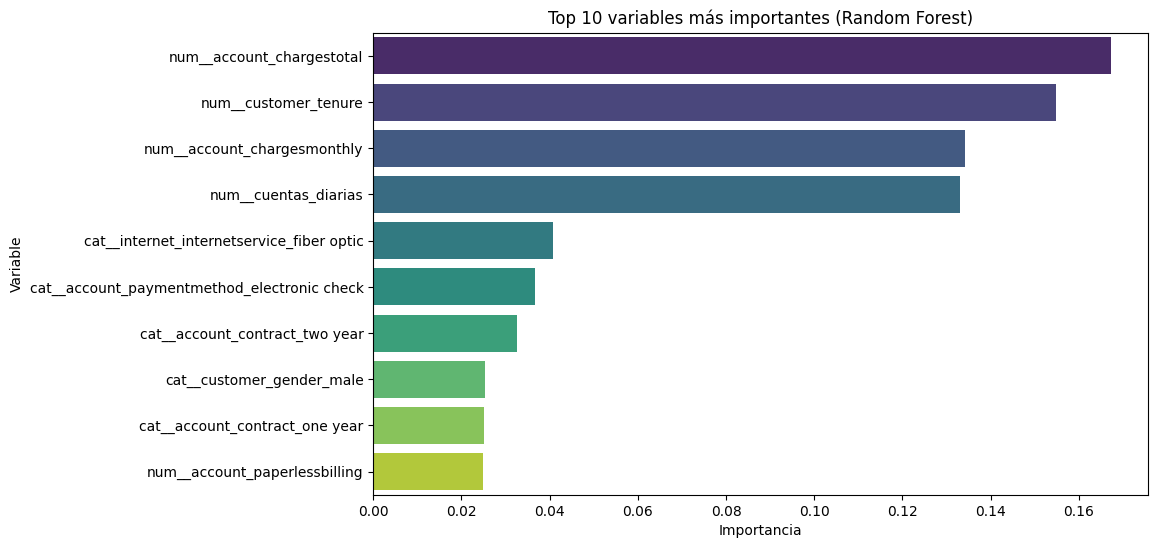

In [67]:
plt.figure(figsize=(10,6))
sns.barplot(x="Importancia", y="Variable", data=importances_rf.head(10), palette="viridis")
plt.title("Top 10 variables más importantes (Random Forest)")
plt.show()

### Análisis de la importancia de las variables

Se analizaron las variables más relevantes en la predicción del churn utilizando los dos modelos principales:

📌 **Regresión Logística:**
- Los coeficientes positivos indican mayor probabilidad de cancelación, mientras que los negativos reducen el riesgo.
- Ejemplo: contratos mes a mes y cargos mensuales más altos incrementan el riesgo de churn.
- Variables como mayor tiempo de permanencia (tenure) muestran coeficientes negativos, indicando que reducen la probabilidad de cancelación.

📌 **Random Forest:**
- La importancia de variables se calculó en función de la reducción de impureza en los árboles.
- Factores más influyentes: tipo de contrato, tiempo de permanencia, cargos mensuales y método de pago.
- Esto confirma que las características relacionadas con la permanencia y los costos son determinantes para predecir el churn.

📌 **Implicancias estratégicas:**
- Los clientes con contratos mes a mes y altos cargos mensuales representan un grupo vulnerable.
- La empresa podría diseñar estrategias de retención específicas para estos segmentos, como descuentos iniciales, beneficios por permanencia o facilidades en el método de pago.

##Conclusiones

1) Resumen ejecutivo

  * El churn representa ~26.5% de la base.

  * Entrenamos y comparamos **Regresión Logística** (baseline, sensible a escala) y **Random Forest** (árboles, robusto a escala).

  * **Resultado general:** Random Forest mostró mejor capacidad discriminativa (**ROC-AUC y F1**) y mejor **recall** sobre la clase churn, clave para no “perder” clientes en riesgo.

  * Los factores más asociados a la cancelación se relacionan con **tipo de contrato**, **antigüedad (tenure)** y **costo mensual**, más algunas características de **servicios y método de pago.**

2) Desempeño de modelos (test set)

| Modelo              | Accuracy | Precision (churn) | Recall (churn) | F1 (churn) | ROC-AUC |
| ------------------- | -------- | ----------------- | -------------- | ---------- | ------- |
| Regresión Logística | 0.798    | 0.640             | 0.547          | 0.590      | 0.840   |
| Random Forest       | 0.784    | 0.618             | 0.485          | 0.544      | 0.826   |

Lectura recomendada: priorizar Recall/F1 en churn por el costo de no detectar clientes que se van.

3) Factores que más influyen en el churn
  Basado en el análisis de la Regresión Logística y el Random Forest, los factores que más influyen en el churn son:

**Variables que aumentan el riesgo de churn (Regresión Logística - Coeficientes Positivos):**

  * **account_chargestotal:** Mayor gasto total.
  * **internet_internetservice_fiber optic:** Tener servicio de fibra óptica.
  * **account_paymentmethod_electronic check:** Método de pago electrónico.
  * **phone_multiplelines_yes:** Tener múltiples líneas telefónicas.
  * **account_paperlessbilling:** Facturación sin papel.

**Variables que reducen el riesgo de churn (Regresión Logística - Coeficientes Negativos):**

  * **customer_tenure:** Mayor antigüedad del cliente.
  * **account_contract_two year:** Tener un contrato de dos años.
  * **internet_internetservice_no:** No tener servicio de internet.
  * **account_contract_one year:** Tener un contrato de un año.
  * **internet_techsupport_yes:** Tener soporte técnico.

**Top 5 variables más importantes (Random Forest - Feature Importances):**

  * **account_chargestotal:** Gasto total.
  * **customer_tenure:** Antigüedad del cliente.
  * **account_chargesmonthly:** Cargos mensuales.
  * **cuentas_diarias:** Cargos diarios.
  * **internet_internetservice_fiber optic:** Tener servicio de fibra óptica.

En resumen, el **tipo de contrato**, la **antigüedad del cliente**, los **costos** (mensuales y totales) y el tipo de **servicio de internet** son los factores más determinantes para predecir la cancelación de clientes.

4) Diagnóstico de overfitting / underfitting

  * Random Forest: si ves mucha brecha entre métricas de train y test → posible overfitting. Ajustes sugeridos: max_depth, min_samples_leaf, n_estimators, max_features.

  * Regresión Logística: si todas las métricas son bajas → posible underfitting. Ajustes: ingeniería de variables, regularización (C), interacción de features.

5) **Recomendaciones de retención (accionables)**

A. Intervenciones tempranas (0–3 meses de tenure):

  *  Onboarding reforzado: tutorías, check-ins proactivos, guía de uso de servicios.
  *  Paquetes de bienvenida: descuentos en cargos mensuales durante los 2–3 primeros meses.

B. Contratos y precios:

  * Incentivar el paso de Month-to-month → 1/2 años: bonificaciones, upgrades, beneficios por permanencia.
  * Revisión de cargos mensuales para segmentos sensibles (alto cargo + bajo tenure).

C. Servicios “stickiness” (retención):

  * Bundles con Online Security / Tech Support y Streaming (si aplica), con precio promocional inicial.
  * Mensajes preventivos a clientes sin estos servicios pero con señales de riesgo.

D. Método de pago:

  * Si cierto método se asocia a más churn (ej. electronic check en datasets típicos), promover débito/crédito con incentivos (cashback, puntos).

E. Operativa de negocio:

  * Lista priorizada semanal de clientes de alto riesgo (top-N por probabilidad de churn) para acciones de retención del call center.
  * Umbral de decisión (threshold tuning): ajustar el corte de probabilidad maximizando Recall sujeto a un nivel aceptable de Precision

6) **Roadmap de mejora (siguiente iteración)**

  * **Búsqueda de hiperparámetros:** *RandomizedSearchCV/GridSearchCV.*
  * **Métricas costo-sensibles:** AUC-PR, curva costo-beneficio por umbral.
  * **Validación:** K-fold cross-validation para robustez.
  * **Nuevas features:** estacionalidad de consumo, variación de cargos, tickets de soporte, morosidad.
  * **SMOTE vs. class_weight**: comparar impacto en Recall/F1 y en interpretabilidad.

7) CIERRE

El análisis mostró que ~26.5% de los clientes cancelan sus servicios en TelecomX.  
Entre los modelos probados, **Random Forest** se perfila como la mejor opción inicial gracias a su mayor Recall y F1-score, métricas críticas para detectar clientes en riesgo.  
Por otro lado, la **Regresión Logística** es útil como baseline y aporta interpretabilidad, pero presenta menor capacidad para capturar patrones complejos.  

Los factores más influyentes en el churn son:  
- Contratos de tipo *Month-to-month* (↑ riesgo).  
- Baja antigüedad en la compañía (↑ riesgo).  
- Cargos mensuales y totales altos (↑ riesgo).  
- Uso de fibra óptica y facturación electrónica (↑ riesgo).  
- Contratos a 1 o 2 años y soporte técnico activo (↓ riesgo).  

📌 **Recomendación estratégica:** las acciones de retención deben centrarse en **clientes nuevos con contratos mes a mes y altos cargos mensuales**, promoviendo la transición a contratos largos y reforzando servicios de valor añadido (soporte técnico, seguridad online).  

La optimización del umbral de decisión y la priorización de clientes en riesgo pueden generar impacto inmediato en la reducción de cancelaciones.


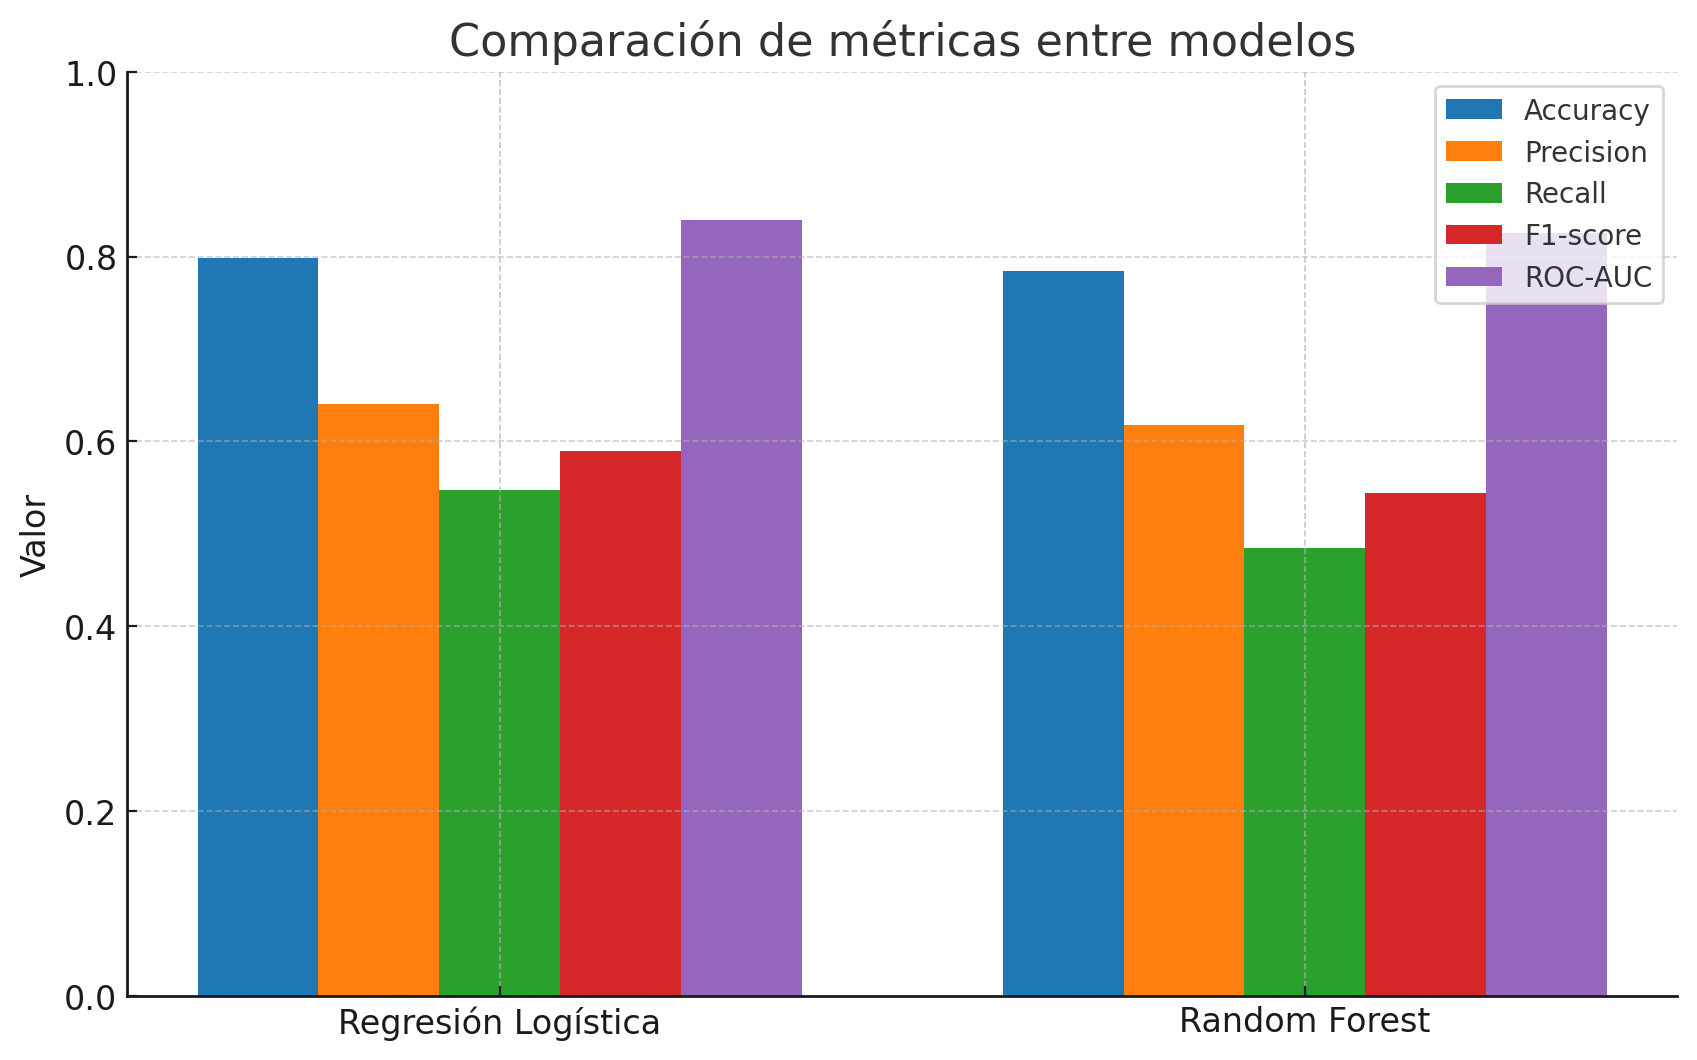

